In [1]:
import os
current_path = os.getcwd()
folder = "MA"
path =  folder.join(current_path.split(folder)[:-1])+folder
os.chdir(path)

folderpath = "notebooks"



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 data_frames = [pd.read_csv(f'{folderpath}/UK_Data/{file_name}',header=None,sep=r"\s+", index_col=False) for i, file_name in enumerate(os.listdir(f'{folderpath}/UK_Data'))]
   

In [4]:
data_frames = [d[d[0] >= 1865] for d in  data_frames]

df = pd.DataFrame([np.array(d[2]) for d in data_frames]).T

# for d in data_frames:
#     print(d[2])
#     plt.plot(d[2])
# plt.show()

In [5]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.788887,0.693016,0.820860,0.745676,0.831557,0.727334,0.725520,0.839860,0.782992,0.730534,0.870280,0.806633,0.791230,0.589834
1,0.788887,1.000000,0.511974,0.654795,0.860678,0.625143,0.553458,0.549324,0.710917,0.754610,0.714847,0.716477,0.613250,0.568799,0.679968
2,0.693016,0.511974,1.000000,0.827894,0.434911,0.821193,0.953826,0.807817,0.765469,0.634645,0.483601,0.776510,0.867155,0.878461,0.299434
3,0.820860,0.654795,0.827894,1.000000,0.574397,0.906873,0.855029,0.746177,0.906137,0.748652,0.579203,0.911307,0.808805,0.839672,0.408373
4,0.745676,0.860678,0.434911,0.574397,1.000000,0.533426,0.474970,0.475414,0.641093,0.753790,0.824576,0.695200,0.550301,0.477914,0.815927
5,0.831557,0.625143,0.821193,0.906873,0.533426,1.000000,0.808764,0.790620,0.857399,0.721549,0.553666,0.879102,0.837246,0.849651,0.358694
6,0.727334,0.553458,0.953826,0.855029,0.474970,0.808764,1.000000,0.805105,0.789549,0.648357,0.505611,0.788396,0.863299,0.897104,0.337050
7,0.725520,0.549324,0.807817,0.746177,0.475414,0.790620,0.805105,1.000000,0.728000,0.624800,0.463470,0.726898,0.899300,0.839647,0.314369
8,0.839860,0.710917,0.765469,0.906137,0.641093,0.857399,0.789549,0.728000,1.000000,0.821646,0.650867,0.912747,0.787291,0.799203,0.478031
9,0.782992,0.754610,0.634645,0.748652,0.753790,0.721549,0.648357,0.624800,0.821646,1.000000,0.751309,0.824292,0.681205,0.639288,0.621231


In [6]:
df=(df-df.mean())/df.std()

eyyyy


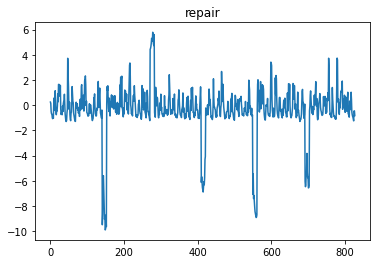

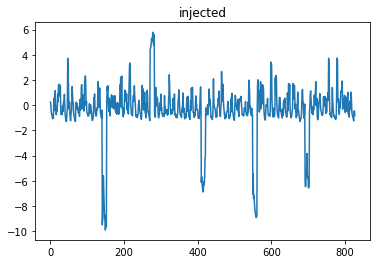

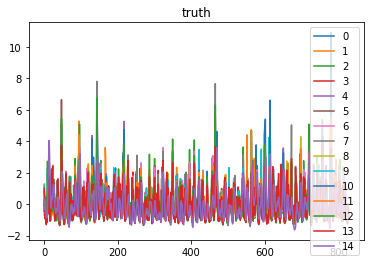

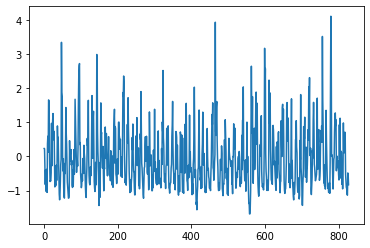

In [7]:

from Scenarios.scenario_types.BaseScenario import BaseScenario
from Repair.Robust_PCA.RPCAestimation.Robust_PCA_repair import RPCA_repair


scen = BaseScenario(df)
injected = scen.train["injected"]
truth = scen.train["original"]
repair_output =  RPCA_repair(injected,cols=[0],n_components=1,threshold=1)
repair = repair_output["repair"]
injected_col , repair_row = injected.iloc[:,0] , repair.iloc[:,0]
plt.show()
repair_row.plot()
plt.title("repair")
plt.show()
injected_col.plot()
plt.title("injected")
plt.show()
truth.plot()
plt.title("truth")
plt.show()

plt.plot(repair_output["reduced"][:,0])

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(injected_col , truth.iloc[:,0])

3.565336756683408

In [9]:
mean_squared_error(repair_row, truth.iloc[:,0])


3.565336743661101

In [10]:
UK = scen.original_data
bafu = BaseScenario("BAFU.txt").original_data.iloc[:35000,:]
motion = BaseScenario("motion_normal.txt").original_data.iloc[5000:]
humidity = BaseScenario("Humidity.csv").original_data


data_sets = {"UK":UK ,"bafu" : bafu , "motion" : motion , "humidity" : humidity}







['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'notebooks', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'screen_example2', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/BAFU.txt
['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesiancomp', 'thesisplots', 'ParameterTuning', '.gitignore', 'myfile.txt', 'IMR.eps', 'IMR.pgf', 'run_ressources', 'notebooks', 'Scenarios', '.git', 'data_methods', 'varanomsizeampBayesianOptimization.svg', 'A_questions', 'myfile.toml', '__pycache__', 'Injection', '.idea', 'Repair', 'searchresults.csv', 'install.sh', 'play.py', 'screen_example2', 'IMR.svg', 'Data', 'play2.py', 'error_ranking.py']
Data/motion_normal.txt
['theisplots\\IMR.eps', 'outputfile_2', 'run.py', 'bayesi

In [11]:
for name , data in data_sets.items():
    print(name)
    print(data.shape)
    print(data.corr().mean().mean())


UK
(1656, 15)
0.7192455793517835
bafu
(35000, 12)
0.7714527582619897
motion
(5001, 20)
0.386328040018051
humidity
(1450, 9)
0.7932371950110244


UK
(1656, 15)
0.7192455793517835


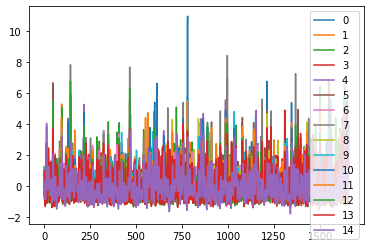

[ 0.63560829  0.33233637  0.08349771 -0.13800809 -0.28662588 -0.35275378
 -0.29707943 -0.1687392   0.03576209  0.21792481]

[ 0.74855836  0.46490873  0.22171188 -0.00894795 -0.17761502 -0.27552048
 -0.24087352 -0.11827148  0.08086772  0.27189848]

[ 0.41278783  0.20469951  0.00323762 -0.1856765  -0.30511932 -0.36863489
 -0.30141069 -0.17175261 -0.00105643  0.17009528]

[ 5.38941209e-01  2.22987661e-01 -4.35468592e-03 -2.27754330e-01
 -3.88252813e-01 -4.52472165e-01 -3.80391040e-01 -2.29064557e-01
 -2.65634715e-04  2.29044098e-01]

[ 0.78615509  0.49755246  0.26312346  0.02535813 -0.17073969 -0.24973485
 -0.2275212  -0.11950897  0.06144784  0.24159015]

[ 0.4434997   0.18685812  0.00476048 -0.17080043 -0.28900437 -0.34975245
 -0.28120084 -0.16621796  0.01559271  0.20681856]

[ 0.50726397  0.27536694  0.03229311 -0.21463225 -0.36828691 -0.43766531
 -0.36227798 -0.20223451  0.00278996  0.21027639]

[ 0.31552787  0.16095292  0.00798164 -0.15709573 -0.25743633 -0.33096562
 -0.27006435 -0.12

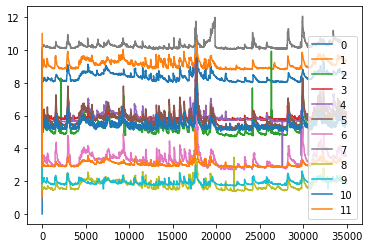

[ 0.63560829  0.33233637  0.08349771 -0.13800809 -0.28662588 -0.35275378
 -0.29707943 -0.1687392   0.03576209  0.21792481]

[ 0.74855836  0.46490873  0.22171188 -0.00894795 -0.17761502 -0.27552048
 -0.24087352 -0.11827148  0.08086772  0.27189848]

[ 0.41278783  0.20469951  0.00323762 -0.1856765  -0.30511932 -0.36863489
 -0.30141069 -0.17175261 -0.00105643  0.17009528]

[ 5.38941209e-01  2.22987661e-01 -4.35468592e-03 -2.27754330e-01
 -3.88252813e-01 -4.52472165e-01 -3.80391040e-01 -2.29064557e-01
 -2.65634715e-04  2.29044098e-01]

[ 0.78615509  0.49755246  0.26312346  0.02535813 -0.17073969 -0.24973485
 -0.2275212  -0.11950897  0.06144784  0.24159015]

[ 0.4434997   0.18685812  0.00476048 -0.17080043 -0.28900437 -0.34975245
 -0.28120084 -0.16621796  0.01559271  0.20681856]

[ 0.50726397  0.27536694  0.03229311 -0.21463225 -0.36828691 -0.43766531
 -0.36227798 -0.20223451  0.00278996  0.21027639]

[ 0.31552787  0.16095292  0.00798164 -0.15709573 -0.25743633 -0.33096562
 -0.27006435 -0.12

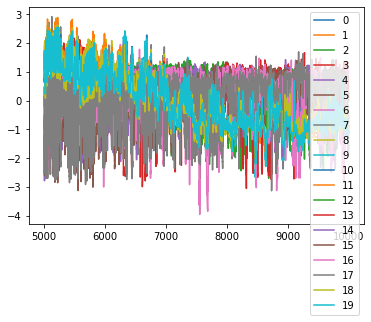

[ 0.63560829  0.33233637  0.08349771 -0.13800809 -0.28662588 -0.35275378
 -0.29707943 -0.1687392   0.03576209  0.21792481]

[ 0.74855836  0.46490873  0.22171188 -0.00894795 -0.17761502 -0.27552048
 -0.24087352 -0.11827148  0.08086772  0.27189848]

[ 0.41278783  0.20469951  0.00323762 -0.1856765  -0.30511932 -0.36863489
 -0.30141069 -0.17175261 -0.00105643  0.17009528]

[ 5.38941209e-01  2.22987661e-01 -4.35468592e-03 -2.27754330e-01
 -3.88252813e-01 -4.52472165e-01 -3.80391040e-01 -2.29064557e-01
 -2.65634715e-04  2.29044098e-01]

[ 0.78615509  0.49755246  0.26312346  0.02535813 -0.17073969 -0.24973485
 -0.2275212  -0.11950897  0.06144784  0.24159015]

[ 0.4434997   0.18685812  0.00476048 -0.17080043 -0.28900437 -0.34975245
 -0.28120084 -0.16621796  0.01559271  0.20681856]

[ 0.50726397  0.27536694  0.03229311 -0.21463225 -0.36828691 -0.43766531
 -0.36227798 -0.20223451  0.00278996  0.21027639]

[ 0.31552787  0.16095292  0.00798164 -0.15709573 -0.25743633 -0.33096562
 -0.27006435 -0.12

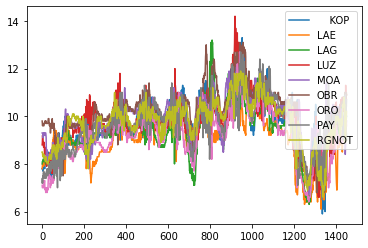

[ 0.63560829  0.33233637  0.08349771 -0.13800809 -0.28662588 -0.35275378
 -0.29707943 -0.1687392   0.03576209  0.21792481]

[ 0.74855836  0.46490873  0.22171188 -0.00894795 -0.17761502 -0.27552048
 -0.24087352 -0.11827148  0.08086772  0.27189848]

[ 0.41278783  0.20469951  0.00323762 -0.1856765  -0.30511932 -0.36863489
 -0.30141069 -0.17175261 -0.00105643  0.17009528]

[ 5.38941209e-01  2.22987661e-01 -4.35468592e-03 -2.27754330e-01
 -3.88252813e-01 -4.52472165e-01 -3.80391040e-01 -2.29064557e-01
 -2.65634715e-04  2.29044098e-01]

[ 0.78615509  0.49755246  0.26312346  0.02535813 -0.17073969 -0.24973485
 -0.2275212  -0.11950897  0.06144784  0.24159015]

[ 0.4434997   0.18685812  0.00476048 -0.17080043 -0.28900437 -0.34975245
 -0.28120084 -0.16621796  0.01559271  0.20681856]

[ 0.50726397  0.27536694  0.03229311 -0.21463225 -0.36828691 -0.43766531
 -0.36227798 -0.20223451  0.00278996  0.21027639]

[ 0.31552787  0.16095292  0.00798164 -0.15709573 -0.25743633 -0.33096562
 -0.27006435 -0.12

In [12]:
for name , data in data_sets.items():
    print(name)
    print(data.shape)
    print(data.corr().mean().mean())
    data.plot()
    plt.show()
    for column in df:
        print(np.array([ df[column].autocorr(i) for i in range(1,11)]))
        print()

In [13]:
print(scen.original_data.corr().mean())
print(scen.original_data.shape)
scen.original_data.corr().mean().abs().mean()


0     0.782948
1     0.686875
2     0.717060
3     0.772545
4     0.657218
5     0.758326
6     0.733857
7     0.699764
8     0.779214
9     0.733891
10    0.651325
11    0.797338
12    0.757032
13    0.735703
14    0.525587
dtype: float64
(1656, 15)


0.7192455793517835

In [15]:
#what lags



df = scen.original_data  
for column in df:
    print((np.array([ df[column].autocorr(i) for i in range(1,11)])))
    print()
    

[ 0.63560829  0.33233637  0.08349771 -0.13800809 -0.28662588 -0.35275378
 -0.29707943 -0.1687392   0.03576209  0.21792481]

[ 0.74855836  0.46490873  0.22171188 -0.00894795 -0.17761502 -0.27552048
 -0.24087352 -0.11827148  0.08086772  0.27189848]

[ 0.41278783  0.20469951  0.00323762 -0.1856765  -0.30511932 -0.36863489
 -0.30141069 -0.17175261 -0.00105643  0.17009528]

[ 5.38941209e-01  2.22987661e-01 -4.35468592e-03 -2.27754330e-01
 -3.88252813e-01 -4.52472165e-01 -3.80391040e-01 -2.29064557e-01
 -2.65634715e-04  2.29044098e-01]

[ 0.78615509  0.49755246  0.26312346  0.02535813 -0.17073969 -0.24973485
 -0.2275212  -0.11950897  0.06144784  0.24159015]

[ 0.4434997   0.18685812  0.00476048 -0.17080043 -0.28900437 -0.34975245
 -0.28120084 -0.16621796  0.01559271  0.20681856]

[ 0.50726397  0.27536694  0.03229311 -0.21463225 -0.36828691 -0.43766531
 -0.36227798 -0.20223451  0.00278996  0.21027639]

[ 0.31552787  0.16095292  0.00798164 -0.15709573 -0.25743633 -0.33096562
 -0.27006435 -0.12

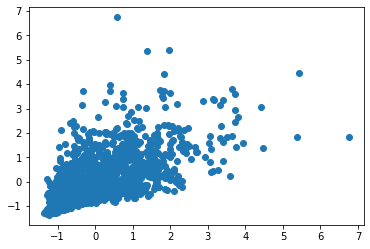

In [22]:
first_series = df[0]
series = first_series[:-1].values
lag_1 = first_series[1:].values
plt.scatter(series,lag_1)

In [21]:
first_series = df[0]


array([ 0.13230553, -0.51256288, -0.68716326, ...,  0.63304625,
        1.86019047,  3.08239317])